In [4]:
import requests
import pandas as pd
import time
import requests
import requests.auth
import praw
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
import nltk

#import
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
import requests
import time, os
from bs4 import BeautifulSoup as bs


#saving
#pickle.dump(aname open("aname.pickle", "wb" ))

#reading df
#submissions_df=pickle.load(open("submissions_df.pickle", "rb"))
#comments_df=pickle.load(open("comments_df.pickle", "rb"))


%run text_preprocessing




['Blood', 'test', 'for', 'Down', "'s", 'syndrome', 'hailed']
['blood', 'test', 'syndrome', 'hailed']


In [177]:
# select only comments
comments_df = comments_df['body']

# remove urls up here so they're caught by the filter in next chunk
comments_df=comments_df.apply(remove_URL)


# find which values are most repeated. these are removed 
pd.DataFrame(comments_df).value_counts(ascending=False).reset_index().head(50)


,body,0
0,[removed],253059
1,[deleted],30365
2,Your [text post]( was removed for not having a...,20828
3,Your comment was removed because it contains a...,17296
4,"Hello, your post was removed because your acco...",7225
5,"If this submission was flaired inaccurately, [...",5312
6,Hello!\n\nDirect links to image or video posts...,4380
7,* **[Bitcoin]( [Pros]( &amp; [Cons]( - Partici...,3364
8,\n\nHere is the link to that Twitter thread on...,3328
9,,1558


#### Remove rows where data is deleted, removed, or a bot response. Any responses with more than two responses will be removed. This number might change when using full dataset 

In [178]:
# save value counts
value_counts = comments_df.value_counts()
# get indices of those with value counts greater than or equal to 2
to_remove = value_counts[value_counts >2].index
# save df as df with all data filtered out
comments_df = comments_df[~comments_df.isin(to_remove)]

#check to make sure looks good
pd.DataFrame(comments_df).value_counts(ascending=False).reset_index()

sample_uncleaned = comments_df.copy()

# PREPROCESSING

In [7]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
from nltk.tokenize import WhitespaceTokenizer
import re
import string
from nltk.tokenize import RegexpTokenizer, word_tokenize
#import spacy
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS

stemmer = SnowballStemmer("english")

whitespace_tokenizer = WhitespaceTokenizer()

#might not use these
#sp = spacy.load('en_core_web_sm')
#all_stopwords = sp.Defaults.stop_words
#all_stopwords = stopwords.words('english')
#all_stopwords.remove('not')



#new_text = remove_stopwords(text)


In [186]:

temp=comments_df.map(lambda x: replace_contractions(x).lower()).str.replace('\d+', '')
temp=temp.map(lambda x:re.sub(r'[^\w\s]','',x))
temp=temp.map(lambda x:word_tokenize(x))
temp=[[word for word in sentence if (len(word)>=3 and len(word)<=12)] for sentence in temp]
temp=pd.Series([" ".join(sentence) for sentence in test])
temp=test.map(lambda x:remove_stopwords(x))
temp=[[stemmer.stem(word) for word in word_tokenize(sentence)] for sentence in temp]
temp=[" ".join(sentence) for sentence in temp]
temp=list(filter(None, temp))

<ipython-input-186-12ccedd4f7b4>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  test=sample_df.map(lambda x: replace_contractions(x).lower()).str.replace('\d+', '')


In [188]:
pd.DataFrame(test)

,0
0,comment regardless moon farm
1,yeah precis want kill eth want altern honest a...
2,tinyman singl import app algorand adopt yield ...
3,crash incom post today like peopl want happen ...
4,hindsight safe consid win burn
...,...
1348111,cro cmon let push tonight
1348112,exact transpar problem origintrail address pro...
1348113,crypto volatil go lose money
1348114,brace adopt incom bullish crypto space


stemmer = SnowballStemmer("english")

whitespace_tokenizer = WhitespaceTokenizer()

#replaces contractions
sample_df=sample_df.map(lambda x: replace_contractions(x))
#removes numbers
sample_df=sample_df.str.replace('\d+', '')
#sample_df=sample_df.apply(remove_URL) # already did this
#remove punctuation
sample_df=sample_df.map(lambda x:re.sub('[%s]' % re.escape(string.punctuation), '', x))
#convert all to lowercase
sample_df=sample_df.map(lambda x: x.lower())
#tokenize
sample_df=sample_df.apply(word_tokenize)
#remove stopwords
sample_df=[[word for word in sentence if not word in all_stopwords] for sentence in sample_df]
#join sentences back together
sample_df=[" ".join(sentence) for sentence in sample_df]
# stem the words 
sample_df=[[stemmer.stem(word) for word in whitespace_tokenizer.tokenize(sentence) if len(word)>=3 ] for sentence in sample_df]
#remove numbers again
sample_df=[remove_numbers(sentence) for sentence in sample_df]
#rejoin again
sample_df=[" ".join(sentence) for sentence in sample_df]
#another filter to remove any punctuation
sample_df=remove_punctuation(sample_df)


# read in preprocessed data

stemmer = SnowballStemmer("english")
whitespace_tokenizer = WhitespaceTokenizer()


sample_df['clean_body']=sample_df['body'].apply(replace_contractions)
sample_df['clean_body']=sample_df['clean_body'].apply(remove_URL)
sample_df['clean_body']=sample_df['clean_body'].map(lambda x:re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
sample_df['clean_body']=sample_df['clean_body'].map(lambda x: x.lower())
sample_df['clean_body']=sample_df['clean_body'].apply(word_tokenize)
sample_df['clean_body']=[[word for word in sentence if not word in all_stopwords] for sentence in sample_df['clean_body']]
sample_df['clean_body']=[" ".join(sentence) for sentence in sample_df['clean_body']]
sample_df['clean_body']=[[stemmer.stem(word) for word in whitespace_tokenizer.tokenize(sentence)] for sentence in sample_df['clean_body']]
sample_df['clean_body']=[" ".join(sentence) for sentence in sample_df['clean_body']]



cv = CountVectorizer(stop_words='english', lowercase=True, min_df = 2, ngram_range = (1,3))
#applying fit_transform on review
X_vect = cv.fit_transform(sample_df['clean_body']).toarray()
#converting to df and naming columns and 
X_vect_df=pd.DataFrame(X_vect,index=sample_df['clean_body'],columns=cv.get_feature_names())


In [384]:
#scroll through page to get all data (bc java...)

#driver.quit()
url = "https://coinmarketcap.com/all/views/all/"
driver = webdriver.Safari()
driver.get(url)
#driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
driver.page_source


y = 1000
for timer in range(0,50):
    driver.execute_script("window.scrollTo(0, "+str(y)+")")
    y += 1000 
    time.sleep(1)
    
    


In [385]:
# soup the page 
soup = bs(driver.page_source)

In [460]:

#get list of all crypto names and symbols
cryp_list = []

### save symbol and name in list created 
for div in soup.find_all('tr'):
    if div.find(class_= "cmc-table__column-name--symbol") != None:
        symbol = div.find(class_= "cmc-table__column-name--symbol").text.lower()
        if div.find(class_= "cmc-table__column-name--name") != None:
            name = div.find(class_= "cmc-table__column-name--name").text.lower()
            cryp_list.append([symbol, name])


#driver.quit()
#cryp_list

# read in from here to save any_dict from processed_df pickle 

In [189]:
## Create dict containing mention of ANY crypto of interest

#cryp_list = pickle.load(open("cryp_list.pickle", "rb"))
#processed_df=pickle.load(open("cleaned_df.pickle", "rb"))

processed_df=pd.DataFrame(processed_df)

any_dict = {}
for index,cryp in enumerate(cryp_list):
    any_dict[cryp[0]] = processed_df[processed_df[0].str.contains("\\b"+cryp_list[index][0]+
                                                          "\\b|\\b"+cryp_list[index][1]+"\\b")]
    
#get rid of empty keys
any_dict=any_dict={k:v for (k,v) in any_dict.items() if not v.empty}

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
## Create dict containing mention of ONLY crypto of interest

#cryp_list = pickle.load(open("cryp_list.pickle", "rb"))
#processed_df=pickle.load(open("cleaned_df.pickle", "rb"))


flat_list = [item for sublist in cryp_list for item in sublist]

only_dict = {}
for index,cryp in enumerate(cryp_list):
    #set flat_list of crypto names to temp
    temp=pd.DataFrame(flat_list)
    #removing the indexed crypt from flat list
    temp=(temp[~temp[0].str.contains('|'.join(cryp_list[index]))][0]).tolist()
    #joining list of cryptos (excluding indexed) together
    temp=('|'.join(temp))
    #get any mention of indexed crypto so long as no other crypto mentioned
    only_dict[cryp[0]] = processed_df[(processed_df[0].str.contains("\\b"+cryp_list[index][0]+"\\b|\\b"+cryp_list[index][1]+"\\b"))&
                                   (~processed_df[0].str.contains(temp))]

    
#get rid of empty keys
only_dict=only_dict={k:v for (k,v) in only_dict.items() if not v.empty}



In [49]:
#create x_vect for each crypto using the crypto names in any_dict

#can delete this 

vect_dict={}
for index,key in enumerate(any_dict):
    if len(key)>=1: 
        cv = CountVectorizer(stop_words='english', min_df = .001)
        vect_dict[key] = pd.DataFrame(cv.fit_transform(any_dict[key][0]).toarray(),
                 index=any_dict[key][0], 
                 columns = cv.get_feature_names())
        
    


# uncleaned dict for sentiment analysis

In [126]:
#save all comments that mention a crypto be name or symbol to dict where key is the crypto symbol

sample_uncleaned=pickle.load(open("sample_uncleaned.pickle", "rb"))

sample_uncleaned=pd.DataFrame(sample_uncleaned)

#including upper case mentions here as well since this is unformatted
uncleaned_dict = {}
for index,cryp in enumerate(cryp_list):
    uncleaned_dict[cryp[0]] = sample_uncleaned[sample_uncleaned['body'].str.contains("\\b"+
                                                                                     cryp_list[index][0]+"\\b|\\b$"+
                                                                                     cryp_list[index][0].upper()+"\\b|\\b$"+
                                                                                     cryp_list[index][0].capitalize()+"\\b|\\b$"+
                                                                                     cryp_list[index][0]+"\\b|\\b"+
                                                                                     cryp_list[index][0].upper()+"\\b|\\b"+
                                                                                     cryp_list[index][0].capitalize()+"\\b|\\b"+
                                                                                     cryp_list[index][1]+"\\b|\\b"+
                                                                                     cryp_list[index][1].upper()+"\\b|\\b"+
                                                                                     cryp_list[index][1].capitalize()+"\\b"
                                                                                    )]
    
#get rid of empty keys
uncleaned_dict=uncleaned_dict={k:v for (k,v) in uncleaned_dict.items() if not v.empty}



/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


# Sentiment analysis


## read in pickled data

In [2]:
import pickle
# uncleaded dict for sentiment analysis
uncleaned_dict=pickle.load(open("uncleaned_dict.pickle", "rb"))

# cleaned dict with ANY mention of a crypto 
any_dict=pickle.load(open("cleaned_dict.pickle", "rb"))

# cleaned dict with ONLY mention of a crypto ---- much smaller then any_dict
only_dict=pickle.load(open("c_only_dict.pickle", "rb"))

# full dataframe 
processed_df=pickle.load(open("cleaned_df.pickle", "rb"))

#vect dict for 
#vect_dict=pickle.load(open("vect_dict.pickle","rb"))

#list of cryptos
cryp_list = pickle.load(open("cryp_list.pickle", "rb"))


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

analyzer = SentimentIntensityAnalyzer() 


#get sentiment for each crypto using uncleaned data (to pick up on punctuation and capitalization etc)
for key in uncleaned_dict:
    if len(uncleaned_dict[key]['body'])>5000:
        print(key, analyzer.polarity_scores(uncleaned_dict[key]['body'].sample(500)))

# Topic Modeling

In [13]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

## LSA for all data

In [282]:
from sklearn.feature_extraction import text 


#text.ENGLISH_STOP_WORDS.union(flat_list)

flat_list = [item for sublist in cryp_list for item in sublist]

#get common words across ALL cryptos-these are probably meaningless for crypto-specific topics
temp=('|'.join(flat_list))
#get top words 
word_counts=X_cv_df.sum().sort_values(ascending=False).reset_index()
#save mask that excludes cryptos and words mentioned more than 1000 times across all data
mask=word_counts[(~word_counts['index'].str.contains(temp))&(word_counts[0]>1000)]['index']#[0]>1000

flat_list.extend(['gt', 'crypto','coin', 'algorand', 'ai', 'com', 'fetch', 'fin', 'yearn', 'bot', 'dyor'])

flat_list=[word_tokenize(word) for word in flat_list]

flat_list=[[stemmer.stem(word) for word in cryp] for cryp in flat_list]

flat_list = [item for sublist in flat_list for item in sublist]

flat_list.extend(mask)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
#removing irrelevant cryptos from dict with ANY mention of the crypto
for key in any_dict.copy():
    if len(any_dict[key][0])<5000:
        #print(key,len(any_dict[key][0]))
        del any_dict[key]
        
del any_dict['gt']
del any_dict['one']
del any_dict['near']
del any_dict['win']
del any_dict['nft']



In [3]:
#removing cryptos with less than 2000 mentions of only that crypto (the only_dict)

for key in only_dict.copy():
    if len(only_dict[key][0])<2000:
        #print(key,len(test_dict[key][0]))
        del only_dict[key]

In [238]:
#pd.DataFrame.from_dict(only_dict, orient='index')


In [164]:
cv = CountVectorizer(stop_words='english')# strip_accents='ascii')#,max_df=0.9,min_df=.009)
#applying fit_transform on review
X_cv_df = cv.fit_transform(pd.concat(only_dict)[0]).toarray()
#converting to df and naming columns and 
X_cv_df=pd.DataFrame(X_cv_df,index=pd.concat(only_dict)[0],columns=cv.get_feature_names())

len(X_cv_df.sum().sort_values(ascending=False))#.head(50)




12369

In [ ]:

flat_list = [item for sublist in cryp_list for item in sublist]

only_dict = {}
for index,cryp in enumerate(cryp_list):
    #set flat_list of crypto names to temp
    temp=pd.DataFrame(flat_list)
    #removing the indexed crypt from flat list
    temp=(temp[~temp[0].str.contains('|'.join(cryp_list[index]))][0]).tolist()
    #joining list of cryptos (excluding indexed) together
    temp=('|'.join(temp))
    #get any mention of indexed crypto so long as no other crypto mentioned
    only_dict[cryp[0]] = processed_df[(processed_df[0].str.contains("\\b"+cryp_list[index][0]+"\\b|\\b"+cryp_list[index][1]+"\\b"))&
                                   (~processed_df[0].str.contains(temp))]

    
#get rid of empty keys
only_dict=only_dict={k:v for (k,v) in only_dict.items() if not v.empty}




In [267]:
#cv_tfidf = TfidfVectorizer(stop_words='english', strip_accents='ascii',max_df=0.9,min_df=.009)


cv_tfidf = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(flat_list), max_df=.3, min_df=5, ngram_range=(1, 3))# strip_accents='ascii')#,max_df=0.9,min_df=.009)
#applying fit_transform on review
X_tfidf = cv_tfidf.fit_transform(only_dict['btc'][0]).toarray()
#converting to df and naming columns and 
X_tf_df=pd.DataFrame(X_tfidf,index=only_dict['btc'][0],columns=cv_tfidf.get_feature_names())


nmf = NMF(6,init=None)
doc_topic = nmf.fit_transform(X_tf_df)
doc_topic_df=pd.DataFrame(doc_topic.round(5),
             index = only_dict['btc'][0])

X_tf_df.shape

(17551, 1924)

In [269]:
topic_term=nmf.components_
topic_term_df=pd.DataFrame(topic_term.round(3), 
             #index = ["component_1", "component_2"],
             columns = cv_tfidf.get_feature_names())

topic_term_df

output=display_topics(nmf,cv_tfidf.get_feature_names(),5)


doc_topic_df=pd.DataFrame(doc_topic.round(5),
           index =only_dict['btc'][0])

#view sentences highest in topic
pd.DataFrame(doc_topic_df[0].sort_values(ascending=False)).head(25)


Topic  1
alt, season, alt season, follow, dump

Topic  2
king, reason, remain king, follow, remain

Topic  3
worth, million, goe, yes, happen

Topic  4
send, send send, satoshi, doubl, address

Topic  5
soon, drop, reach, anytim, break

Topic  6
mean, dump, actual, crash, high




,0
0,
btc alt,0.26723
bitcoin alt bitcoin,0.26723
btc alt,0.26723
btc alt coin lol,0.26723
hope alt bitcoin time,0.26723
btc alt btc crypto,0.26723
btc alt,0.26723
hold btc hit alt hit ath sell wait dip,0.26723
let btc juici alt,0.26723


In [32]:
cv_tfidf = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(flat_list), ngram_range=(1, 2), strip_accents='ascii',max_df=8.0,min_df=.001)
#applying fit_transform on review
X_tfidf = cv_tfidf.fit_transform(a_dict['btc'][0]).toarray()
#converting to df and naming columns and 
X_tf_df=pd.DataFrame(X_tfidf,index=a_dict['btc'][0],columns=cv_tfidf.get_feature_names())



In [57]:


cv_tfidf = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(cryp_list[0]), min_df=.01)
#applying fit_transform on review
X_tfidf = cv_tfidf.fit_transform(only_dict['btc'][0]).toarray()
#converting to df and naming columns and 
X_tf_df=pd.DataFrame(X_tfidf,index=only_dict['btc'][0],columns=cv_tfidf.get_feature_names())


lsa = TruncatedSVD(n_components=X_tf_df.shape[1]-1)
doc_topic = lsa.fit_transform(X_tf_df)
doc_topic_df=pd.DataFrame(doc_topic.round(5),
             index = only_dict['btc'][0])#,
             #columns = ["component_1","component_2" ])

    
#tsvd_var_ratios = tsvd.explained_variance_ratio_
ratios=lsa.explained_variance_ratio_


# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components


select_n_components(ratios, 0.8)


55

In [375]:
#testing out for btc

cv = CountVectorizer(stop_words='english', min_df=.01)
#applying fit_transform on review
X_vect = cv.fit_transform(a_dict['btc'][0]).toarray()
#converting to df and naming columns and 
X_vect_df=pd.DataFrame(X_vect,index=a_dict['btc'][0],columns=cv.get_feature_names())


lsa = TruncatedSVD(n_components = 3)
doc_topic = lsa.fit_transform(X_vect_df)
doc_topic_df=pd.DataFrame(doc_topic.round(5),
             index = a_dict['btc'][0])#,
             #columns = ["component_1","component_2" ])
lsa.explained_variance_ratio_

topic_term=lsa.components_
topic_term_df=pd.DataFrame(topic_term.round(3), 
             #index = ["component_1", "component_2"],
             columns = cv.get_feature_names())

topic_term_df

output=display_topics(lsa,cv.get_feature_names(),10)


doc_topic_df=pd.DataFrame(doc_topic.round(5),
             index =a_dict['btc'][0])#,
             #columns = ["component_1","component_2" ])

print(lsa.explained_variance_ratio_)


Topic  1
like, peopl, market, buy, money, time, year, think, price, invest

Topic  2
market, price, cap, bear, buy, year, bull, sell, time, alt

Topic  3
buy, sell, price, dip, bought, money, hold, want, dca, profit


[0.07050488 0.02643708 0.02281595]


In [82]:
#sample_df

In [64]:
cv = CountVectorizer(stop_words='english', min_df=.01)
#applying fit_transform on review
X_vect = cv.fit_transform(sample_df).toarray()
#converting to df and naming columns and 
X_vect_df=pd.DataFrame(X_vect,index=sample_df,columns=cv.get_feature_names())


lsa = TruncatedSVD(2)
doc_topic = lsa.fit_transform(X_vect_df)
doc_topic_df=pd.DataFrame(doc_topic.round(5),
             index = pd.Series(sample_df),
             columns = ["component_1","component_2" ])
lsa.explained_variance_ratio_

### YOUR CODE HERE
topic_term=lsa.components_
topic_term_df=pd.DataFrame(topic_term.round(3), 
             index = ["component_1", "component_2"],
             columns = cv.get_feature_names())



output=display_topics(lsa,cv.get_feature_names(),10)


doc_topic_df=pd.DataFrame(doc_topic.round(5),
             index = pd.Series(sample_df),
             columns = ["component_1","component_2" ])

print(lsa.explained_variance_ratio_)

topic_term_df
output
doc_topic_df





Topic  1
crypto, like, peopl, coin, buy, money, think, market, time, invest

Topic  2
crypto, bank, money, invest, tax, world, pay, life, talk, understand


[0.06042106 0.03183122]


,component_1,component_2
comment regardless moon farm,0.05332,-0.03113
yeah precis want kill eth want altern honest afford use eth person know,0.75159,-0.28393
tinyman singl import app algorand adopt yield portal level idea impact big headlin airdrop got april worth thank tinyman,0.16276,-0.03976
crash incom post today like peopl want happen workimg lol want peopl lose money buy cheaper look like normal weekend sell happen week pump note alarm,2.47814,-1.02610
hindsight safe consid win burn,0.00000,0.00000
...,...,...
cro cmon let push tonight,0.06640,-0.02666
exact transpar problem origintrail address provid decentr solut offer interoper think follow way origintrail like googl web way googl crawl internet form connect associ websit metadata dkg creat connect associ access physic digit asset applic develop use vast network inform build knowledg specif asset app organ adopt decentr technolog instead similar central solut hesit trust organ data reluct share competit data parti origintrail dkg solut serv catalyst cooper competitor exampl work european union railway fact drive decentr custom primari reason origintrail shift central suppli chain data compani form decentr knowledg graph,0.94994,-0.41230
crypto volatil go lose money,0.63720,0.88444
brace adopt incom bullish crypto space,0.41206,0.83297


In [286]:
from sklearn.feature_extraction import text 


#text.ENGLISH_STOP_WORDS.union(flat_list)

flat_list = [item for sublist in cryp_list for item in sublist]

#get common words across ALL cryptos-these are probably meaningless for crypto-specific topics
temp=('|'.join(flat_list))
#get top words 
word_counts=X_cv_df.sum().sort_values(ascending=False).reset_index()
#save mask that excludes cryptos and words mentioned more than 1000 times across all data
mask=word_counts[(~word_counts['index'].str.contains(temp))&(word_counts[0]>1500)]['index']#[0]>1000

flat_list.extend(['gt', 'crypto','coin', 'algorand', 'ai', 'com', 'fetch', 'fin', 'yearn', 'bot', 'dyor'])

flat_list=[word_tokenize(word) for word in flat_list]

flat_list=[[stemmer.stem(word) for word in cryp] for cryp in flat_list]

flat_list = [item for sublist in flat_list for item in sublist]

flat_list.extend(mask)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


## LSA function

In [291]:
def lsa_fxn(data, dimensions):
    cv = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS.union(flat_list), min_df=2, max_df=.1)
    #applying fit_transform on review
    X_vect = cv.fit_transform(data).toarray()
    #converting to df and naming columns and 
    X_vect_df=pd.DataFrame(X_vect,index=data,columns=cv.get_feature_names())
    #instantiate lsa
    lsa = TruncatedSVD(dimensions)
    #transform the X_vect_df 
    doc_topic = lsa.fit_transform(X_vect_df)
    # how much each term belongs to the different components
    topic_term=lsa.components_
    topic_term_df=pd.DataFrame(topic_term.round(3), 
             #index = ["component_1", "component_2"],
             columns = cv.get_feature_names())
    # most common word/phrase for each component
    output=display_topics(lsa,cv.get_feature_names(),5)
    # df for each term belongs to the different components
    doc_topic_df = pd.DataFrame(doc_topic.round(5),
             index = pd.Series(data))#,
             #columns = ["component_1","component_2",  ])
    
    
    return(doc_topic_df, output, topic_term_df )


## LSA fxn applied to a cryp

In [292]:
#lsa_fxn(a_dict['btc'][0], 2)

#a_dict.map(lambda x: lsa_fxn(x[0],2))

for key in only_dict:
    print(key)
    lsa_fxn(only_dict[key][0],2)

btc

Topic  1
hit, alt, ath, wait, week

Topic  2
hit, ath, week, wait, today


eth

Topic  1
killer, ath, kill, real, high

Topic  2
ath, hit, wait, come, high


sol

Topic  1
sold, fud, hate, better, news

Topic  2
central, fud, sub, hate, shit


ada

Topic  1
stabl, holder, stablecoin, soon, hope

Topic  2
stablecoin, come, holder, bag, feel


dot

Topic  1
auction, project, ath, today, come

Topic  2
ath, today, hit, soon, feel


doge

Topic  1
moon, liter, meme, said, king

Topic  2
meme, dog, king, burger, sure


shib

Topic  1
moon, invest, guy, million, shit

Topic  2
moon, sleepi, yes, rocket, step


cro

Topic  1
cryptocom, coinbas, list, moon, exchang

Topic  2
moon, today, week, fomo, way


algo

Topic  1
wallet, govern, yield, use, vote

Topic  2
moon, way, comment, fuck, say


link

Topic  1
post, thank, click, read, twitter

Topic  2
thank, click, check, use, send


vet

Topic  1
list, coinbas, thursday, wait, come

Topic  2
final, hope, come, make, wait


lrc

Topic  1


# clustering

In [324]:
#Basic imports
import numpy as np
import pandas as pd

#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [311]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_tf_df)
clusters=kmeans.predict(X_tf_df)
X_tf_df["Cluster"] = clusters

In [312]:
X_tf_df
import numpy as np

#plotX is a DataFrame containing 5000 values sampled randomly from X
plotX = pd.DataFrame(np.array(X_tf_df.sample(5000)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X_tf_df.columns

In [313]:
plotX
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

In [314]:
#This DataFrame holds that single principal component mentioned above
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [315]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [316]:
plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')

In [317]:
plotX["dummy"] = 0

In [318]:
#Note that all of the DataFrames below are sub-DataFrames of 'plotX'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [319]:
#This is needed so we can display plotly plots properly
init_notebook_mode(connected=True)

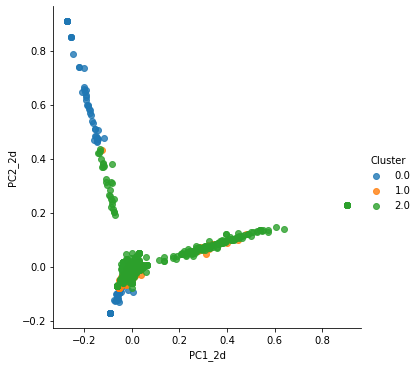

In [328]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

import seaborn as sns
sns.lmplot( x="PC1_2d", y="PC2_2d", data=plotX, fit_reg=False, hue='Cluster', legend=True)

init_notebook_mode(connected=True)

In [323]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)